## k-Means Clustering and Principal Component Analysis

This lab will focus on applying k-Means Clustering and Principal Component Analysis to the chosen dataset. 

It was crucial to take into account that for K-Means and Principal Compotent Analysis (PCA) to be meaningful, it is necessary to utilize numerical and encoded categorical variables

# Table of Contents
### Sections in Lab:
1. [Importing Libraries](#section1)

2. [Loading Dataset](#section2)
    - [Understanding the Data ](#section2.1)

3. [Pre-processing the Data ](#section3)

4. [Understanding the Preprocessed Data](#section4)

5. [Snippet of Other Considerations](#section5)

6. [Principle Component Analysis and k-Means Clusterings](#section6)

7. [Additional aspects of PCA](#section7)

8. [Optimization and Hyper-parameter Tuning](#section8)

## <a id='section1'></a>
## Section 1: Importing Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV


## Interpretation:

Pandas: This is data manipulation and analysis.

Matplotlib.pyplot: Used for creating static, animated, or interactive visualizations.

PCA: Method of reducing the dimensionality.

StandardScaler and OneHotEncoder: Used for standardizing features within the dataset by removing the mean and scaling to unit variance, and for converting categorical variable(s) into dummy/indicator variables. 

SimpleImputer: For imputing missing values.

sklearn.cluster: This is used in implementing a clustering algorithm, which is an unsupervised machine learning method.

<a id='section2'></a>
## Section 2: Loading Dataset

The dataset is loaded into a pandas DataFrame

In [65]:
# Note : Enter the full file directory in order to load the csv file
try:
    file_path = "/Users/christophertheys/Desktop/heart_disease.csv"
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"The file at {file_path} does not exist. Please check the file path and try again.")
    data = None
except pd.errors.EmptyDataError:
    print(f"The file at {file_path} is empty. Please provide a valid data file.")
    data = None
except Exception as e:
    print(f"An unexpected error occurred while loading the file: {e}")
    data = None

# Will display the first five rows within the dataset
if data is not None:
    print(data.head())
    print("\n")

   Gender  age      education  currentSmoker  cigsPerDay  BPMeds   
0    Male   39   postgraduate              0         0.0     0.0  \
1  Female   46  primaryschool              0         0.0     0.0   
2    Male   48     uneducated              1        20.0     0.0   
3  Female   61       graduate              1        30.0     0.0   
4  Female   46       graduate              1        23.0     0.0   

  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI   
0              no             0         0    195.0  106.0   70.0  26.97  \
1              no             0         0    250.0  121.0   81.0  28.73   
2              no             0         0    245.0  127.5   80.0  25.34   
3              no             1         0    225.0  150.0   95.0  28.58   
4              no             0         0    285.0  130.0   84.0  23.10   

   heartRate  glucose Heart_ stroke  
0       80.0     77.0            No  
1       95.0     76.0            No  
2       75.0     70.0     

<a id='section2.1'></a>
## Section 2.1: Understanding the Data

Variable Description:

* [Gender, education, prevalentStroke, Heart_stroke] - These are categorical variables

* [age, cigsPerDay, totChol, sysBP, diaBP, BMI, heartRate, glucose] - These are numerical variables

* [currentSmoker, BPMeds, prevalentHyp, diabetes] - These are binary variables (0/1)


<a id='section3'></a>
## Section 3: Pre-processing the Data

In [66]:
# Data Cleaning and Pre-processing

# Handling Variables:
categorical_vars = ['Gender', 'education', 'prevalentStroke']
numerical_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
binary_vars = ['currentSmoker', 'BPMeds', 'prevalentHyp', 'diabetes']

# Handling missing Data:
numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])

categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

binary_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', StandardScaler())
    ])

# Preprocessing:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_vars),
        ('cat', categorical_transformer, categorical_vars),
        ('bin', binary_transformer, binary_vars)
    ]
)
# Transformation:
Final_preprocessed = preprocessor.fit_transform(data)


<a id='section4'></a>
### Section 4: Understanding the Preprocessed Data

### Handling Variables:
* The list of categorical columns in the dataset are one-hot encoded and numerical columns are standardized. Binary variables are treated uniquely. Based on the data, the binary variables are purely categorical and therefore, the most suitable method was to treat them differently from other categorical variables

* Normalisation of binary variables serve to be benefical by scaling the binary variables along with numerical variables so that all features contribute equally to the distance computation. PCA and k-Means are distance-based model and as such, ensuring all variables are on the same scale is crucial due to it allowing each feature to contribute equally to the computation of distances.

### Handling Missing Data:

* The application of imputation fills in missing values so that the model can handle the data without throwing errors. Handling the missing data is essential before feeding the data into the pipeline
    
### Numerical Feature Preprocessing: 

* The choice of ‘mean’ was the best suitable strategy for this assessment. This will indicate missing values and then be replaced by the mean value of each respective feature/column to aim in preserving data distribution. 

### Categorical Feature Preprocessing: 

* The strategy chosen, 'most_frequent' was ulitiized. This meant that any missing values will be replaced by the most frequent value in that column.

### Binary Feature Preprocessing: 

* The strategy 'most_frequent' was used. Any missing values would be replaced with the most common value in the column. Binary variables normally represent two categories, therefore imputing using 'most_frequent' ensures that imputed values are also binary, maintaining the variable's binary nature.

### Scaling:

* Scaling becomes useful for distance-based models where ensuring all variables are on the same scale. This is crucial because it allows each feature to contribute equally to the computation of distances.

### Data Split:

* Machine learning models normally split the data into training and test datasets which is essential for evaluating the model's performance. However, in this case, an unsupervised learning model is tested. With Principal Component Analysis (PCA) and K-Means clustering, spiltting datasets is not necessary because there isn't any training of a predictive model.


<a id='section5'></a>
## Section 5: Snippet of Other Considerations

### Validation and Test Split

* Even though this lab explores PCA and k-Means Clustering, which are unsupervised models, considering a subset of data for validation and testing could be crucial in the stages of preprocessing. This is done to ensure that the chosen strategies above are effective and do not merely overfit or adapt to the particular sample.



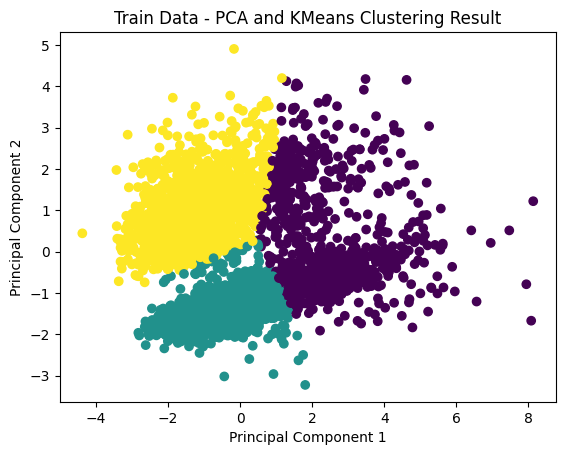

In [67]:
# Variable categories
categorical_vars = ['Gender', 'education', 'prevalentStroke']
numerical_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
binary_vars = ['currentSmoker', 'BPMeds', 'prevalentHyp', 'diabetes']

# Handling Missing Data and Preprocessing:

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_vars),
        ('cat', categorical_transformer, categorical_vars),
        ('bin', binary_transformer, binary_vars)
    ])

# Define the model - Apply PCA and K-Means
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),
    ('model', KMeans(n_clusters=3, n_init=10, random_state=0))
])

# Using a replicated dataset to apply the above consideration

data_copy = data.copy()

y = data_copy['Heart_ stroke']
X = data_copy.drop('Heart_ stroke', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(X_train, y_train)

train_pca_result = pipeline.named_steps['pca'].transform(pipeline.named_steps['preprocessor'].transform(X_train))
test_pca_result = pipeline.named_steps['pca'].transform(pipeline.named_steps['preprocessor'].transform(X_test))


plt.scatter(train_pca_result[:, 0], train_pca_result[:, 1], c=pipeline.named_steps['model'].labels_, cmap='viridis')
plt.title('Train Data - PCA and KMeans Clustering Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


The visualization shows the result of applying PCA and k-Means clustering to training data. 

PCA is applied to reduce the dimensionality of the dataset down to two principal components. After reducing the dimensionality of the data using PCA, k-Means clustering is applied. 

Based on the visualisation, the pipeline model shows that it generalizes well to unseen data. 

<a id='section6'></a>
## Section 6: Principle Component Analysis and k-Means Clusterings

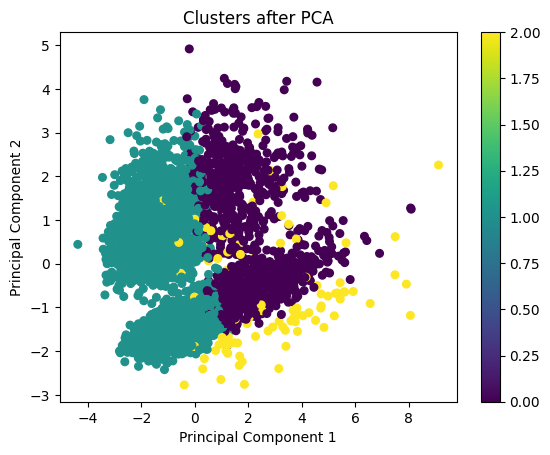

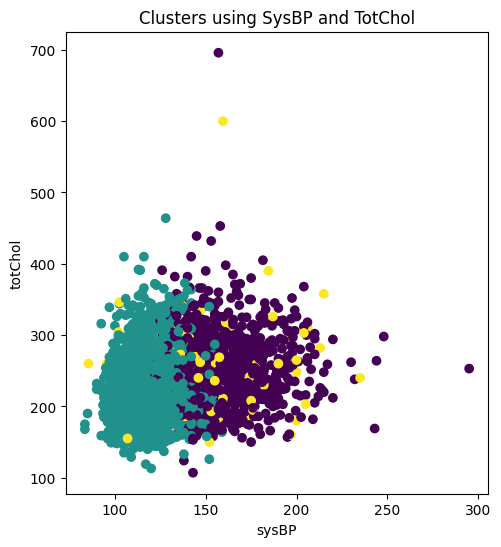

Text(0, 0.5, 'Glucose')

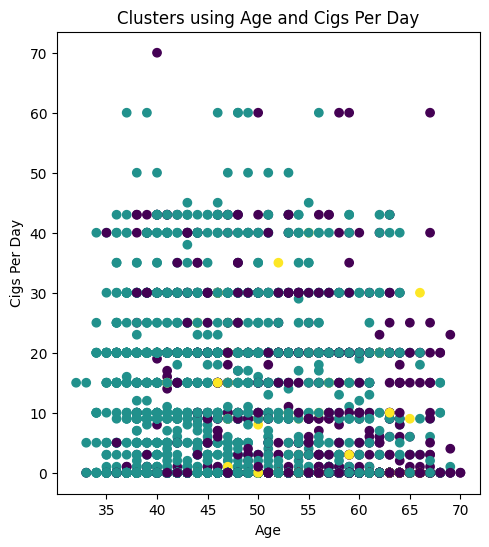

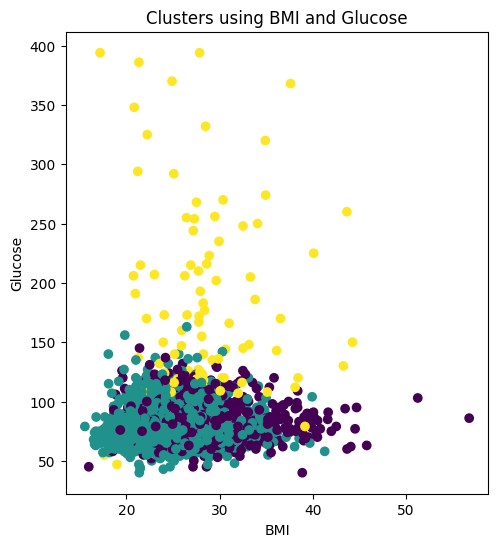

In [49]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Final_preprocessed)

kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
clusters = kmeans.fit_predict(Final_preprocessed)

# Visual 1 
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=clusters, cmap='viridis', marker='o', s=30)
plt.title('Clusters after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


# Visual 2
data['Cluster'] = clusters

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['sysBP'], data['totChol'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters using SysBP and TotChol')
plt.xlabel('sysBP')
plt.ylabel('totChol')
plt.show()

# Visual 3

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['age'], data['cigsPerDay'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters using Age and Cigs Per Day')
plt.xlabel('Age')
plt.ylabel('Cigs Per Day')


# Visual 4

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['BMI'], data['glucose'], c=clusters, cmap='viridis')
plt.title('Clusters using BMI and Glucose')
plt.xlabel('BMI')
plt.ylabel('Glucose')


### Visuals Interpretation:

* The features chosen for the different visuals offer insight into it's correlation and how they differ from one another

* Features which don’t have all data points concentrated in one region indicate a diverse spread of data

* All these visuals could help reveal patterns related to cardiovascular health and are particularly interesting where clusters reveal subgroups with varying levels of cardiovascular risk. 

* The spread speaks to data variance. How spread out the points are along the axes indicates how much variance there is in those directions and the amount of variance. 

* Cluster seperation suggests that K-means would have found relatively distinct groupings in the data. Age & cigsPerDay and BMI & Glucose indicate distinct groupings for the data


<a id='section7'></a>
## Section 7: Additional aspects of PCA

Explained variance ratio: [0.23997958 0.13657549 0.11791322 0.07875188]


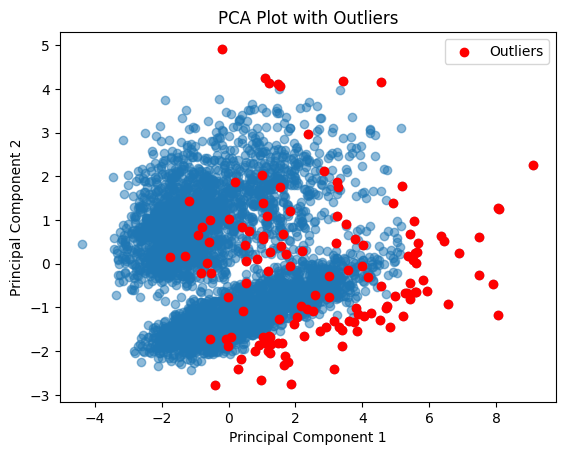

In [68]:
# Prior assigned value to n_components was 2

pca = PCA(n_components=4)  
X_pca = pca.fit_transform(Final_preprocessed)

explained_variance_ratio = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance_ratio}')

z_scores = np.abs(zscore(X_pca))
 
threshold = 3

outliers = np.where(np.any(z_scores > threshold, axis=1))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.scatter(X_pca[outliers, 0], X_pca[outliers, 1], color='r', label='Outliers')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Outliers')
plt.legend()

plt.show()

<a id='section8'></a>
## Section 8: Optimization and Hyper-parameter Tuning

* Applying hyperparameter tuning can help to refine the unsupervised learning model and enhance the quality and reliability of the formed clusters. However, finding an optimal number of clusters in k-Means or an optimal number of principal components in PCA can significantly impact the model's usefulness and interpretability.

* Due to this model being an unsupervised learning model, validating the results is inherently challenging due to the absence of labels.

In [74]:
# Illustration of how hyper-parameter tuning would be applied

parameter_grid_deter = {'n_clusters': range(2,8),
              'init': ['k-means++', 'random'],
              'n_init': [10, 10],
              'max_iter': [300, 600]}

def silhouette_scorer(estimator, X):
    return silhouette_score(X, estimator.labels_)

grid_search = GridSearchCV(KMeans(random_state=42), parameter_grid_deter, scoring=silhouette_scorer, cv=3)
grid_search.fit(Final_preprocessed)

best_parameters = grid_search.best_parameters_
